<a href="https://colab.research.google.com/github/ssaulrj/codes-python/blob/master/artificial-vision-actumlogos-python/class_four_cascada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Se importan bilbiotecas
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Se cargan los archivos de los clasificadores

detector_rostro = 'haarcascade_frontalface_default.xml'
detector_sonrisa = 'haarcascade_smile.xml'
detector_ojos = 'haarcascade_eye.xml'

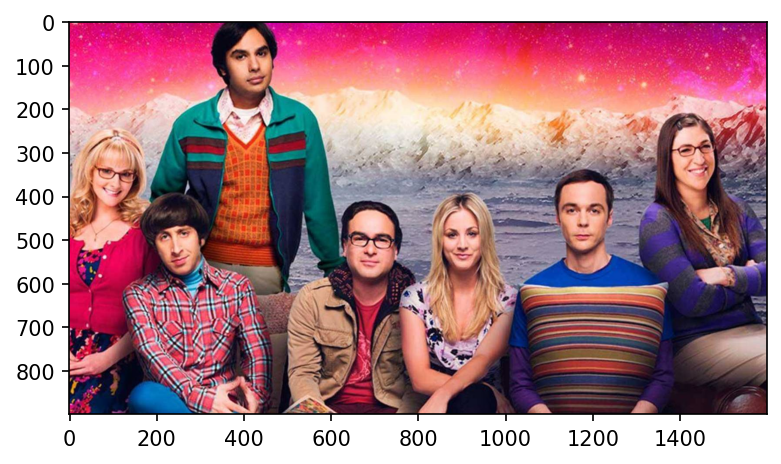

In [10]:
# Se carga la imagen a ser usada.
img_orig = cv2.imread('BigBang.jpg')
gris = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

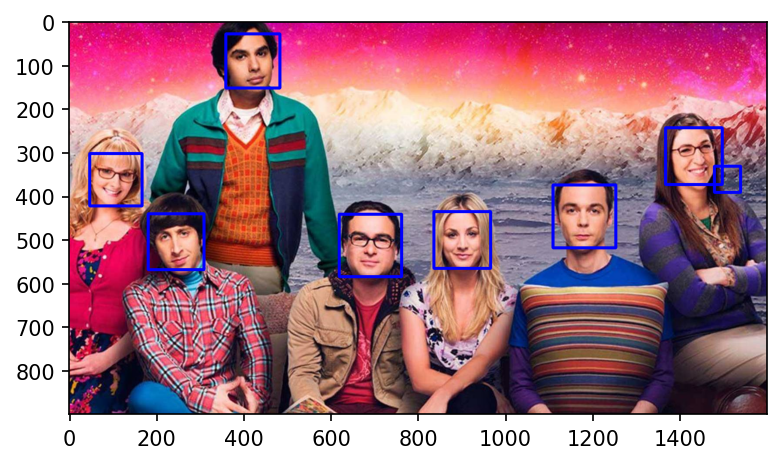

In [11]:
# Copia de la imagen original para graficar sobre ella
img_rostros = img_orig.copy()
# Clasificador en cascada de rostros
clas_rostros = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Detección en multiescalas
rostros = clas_rostros.detectMultiScale(gris, 1.3, 5)
# Se dibujan los rectangulos de las caras
for (x,y,w,h) in rostros:
     cv2.rectangle(img_rostros,(x,y),(x+w,y+h),(255,0,0),5)
plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_rostros, cv2.COLOR_BGR2RGB))
plt.show()

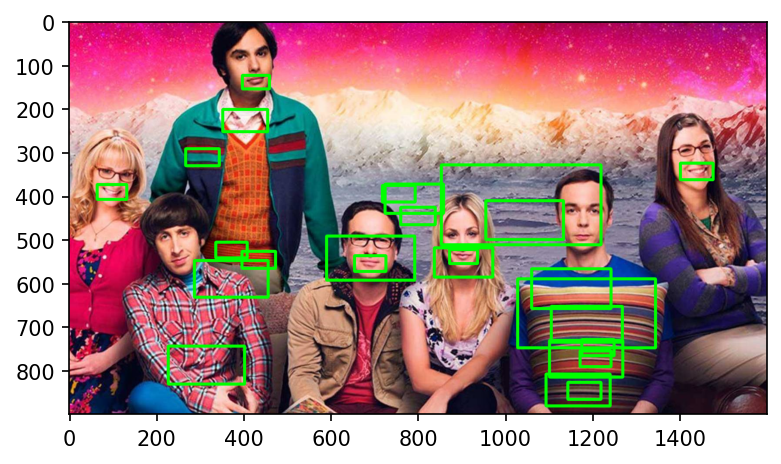

In [12]:
img_sonrisa = img_orig.copy()

# Clasificador en cascada de sonrisas
clas_sonrisas = cv2.CascadeClassifier('haarcascade_smile.xml')
sonrisas = clas_sonrisas.detectMultiScale(gris, 1.3, 20)
for (x,y,w,h) in sonrisas:
     cv2.rectangle(img_sonrisa,(x,y),(x+w,y+h),(0,255,0),5)
plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_sonrisa, cv2.COLOR_BGR2RGB))
plt.show()

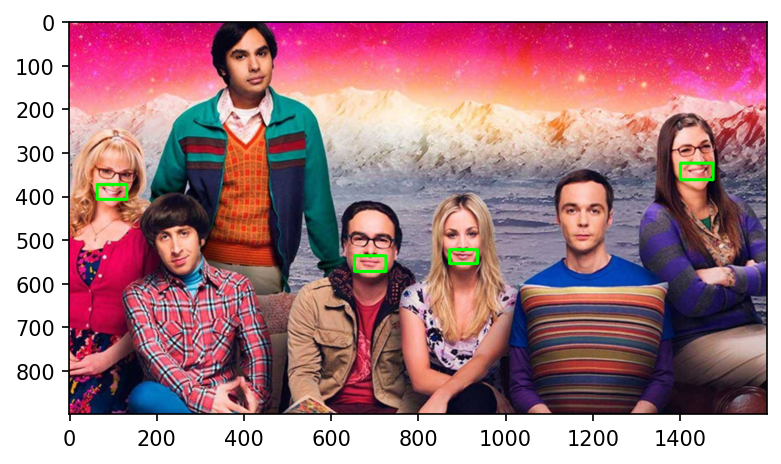

In [13]:
img_sonr_rost = img_orig.copy()

# Doble for para buscar sonrisas dentro de rostros
for (x,y,w,h) in rostros:
  for (x_s,y_s,w_s,h_s) in sonrisas:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(img_sonr_rost, (x_s,y_s), (x_s+w_s,y_s+h_s), (0,255,0), 5)

plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_sonr_rost, cv2.COLOR_BGR2RGB))
plt.show()

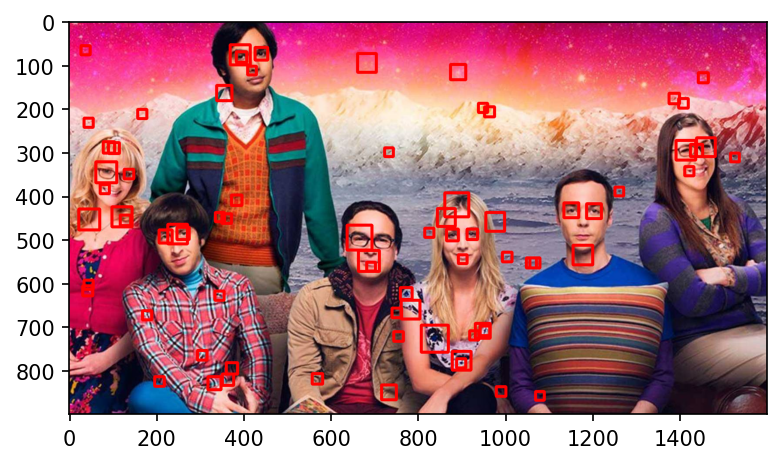

In [14]:
img_ojos = img_orig.copy()

# Clasificador en cascada de ojos
clas_ojos = cv2.CascadeClassifier('haarcascade_eye.xml')
ojos = clas_ojos.detectMultiScale(gris, 1.1, 1)

for (x,y,w,h) in ojos:
     cv2.rectangle(img_ojos, (x, y), (x+w, y+h), (0, 0, 255), 5)

plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_ojos, cv2.COLOR_BGR2RGB))
plt.show()

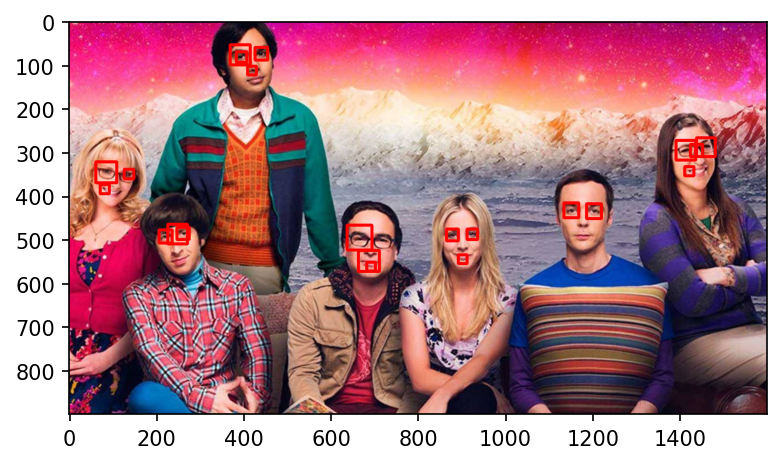

In [15]:
img_ojos_rost = img_orig.copy()

# Doble for para buscar ojos dentro de rostros
for (x,y,w,h) in rostros:
  for (x_s,y_s,w_s,h_s) in ojos:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(img_ojos_rost, (x_s,y_s), 
                    (x_s+w_s,y_s+h_s), (0, 0, 255), 5)

plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_ojos_rost, cv2.COLOR_BGR2RGB))
plt.show()

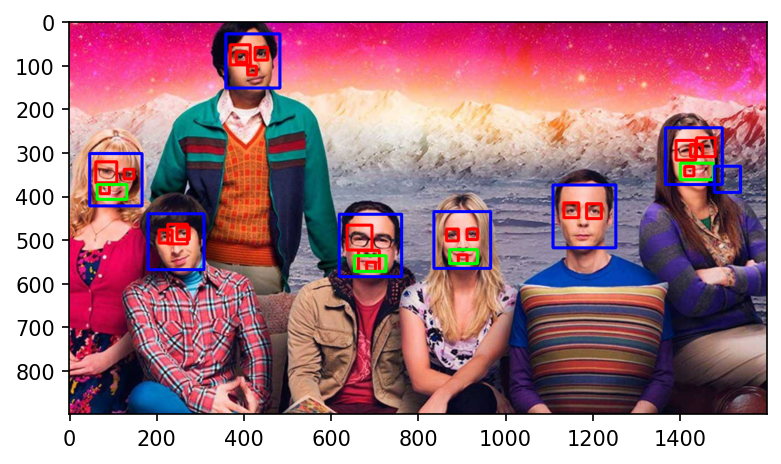

In [16]:
img_final = img_orig.copy()

# Dentro de los ojos, busca sonrisas y ojos
for (x,y,w,h) in rostros:
  cv2.rectangle(img_final,(x,y),(x+w,y+h),(255,0,0), 5)
  for (x_s,y_s,w_s,h_s) in ojos:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(img_final, (x_s,y_s),(x_s+w_s,y_s+h_s),(0, 0, 255), 5)
  for (x_s,y_s,w_s,h_s) in sonrisas:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(img_final, (x_s,y_s),(x_s+w_s,y_s+h_s),(0, 255, 0), 5)

plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()